In [2]:
import glob
import pandas as pd

files = glob.glob('Olympics/*')
# Load the dataframes iteratively
for file in files:
    df = pd.read_excel(file)
    print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 ent

# Concatenating DataFrames

In [3]:
all_df = []
for file in files:
    df = pd.read_excel(file)
    all_df.append(df)

/home/ivanyingx/miniconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
pd.concat(all_df)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Discipline,Female,Male,Name,NOC,Event
0,1.0,United States of America,39.0,41.0,33.0,113.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,People's Republic of China,38.0,32.0,18.0,88.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Japan,27.0,14.0,17.0,58.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Great Britain,22.0,21.0,22.0,65.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,ROC,20.0,28.0,23.0,71.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Polo,NaN,NaN,South Africa,South Africa,Women
739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Polo,NaN,NaN,Spain,Spain,Men
740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Polo,NaN,NaN,Spain,Spain,Women
741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Water Polo,NaN,NaN,United States,United States of America,Men


# Task 4 Olympics practical

In [14]:
gender_df = pd.read_excel('Olympics/EntriesGender.xlsx')

In [2]:
gender_df.plot.bar()

NameError: name 'gender_df' is not defined

This looks awful

In [18]:
gender_df.set_index('Discipline', inplace=True)


In [21]:
x = {1: 3, 4:5}

In order to get a column, you can just index it, but it will return a Series

In [23]:
type(gender_df['Female'])

pandas.core.series.Series

If you want to get a DataFrame, you need to index using two square brackets

In [25]:
type(gender_df[['Female']])

pandas.core.frame.DataFrame

A series can only contain a column

In [27]:
gender_df['Female', 'Male']

KeyError: ('Female', 'Male')

<AxesSubplot:xlabel='Discipline'>

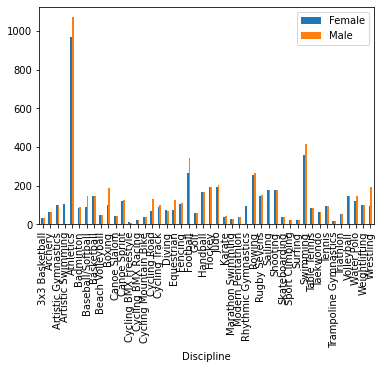

In [30]:
new_df = gender_df[['Female', 'Male']]
new_df.plot.bar()

Text(0, 0.5, 'Total Count')

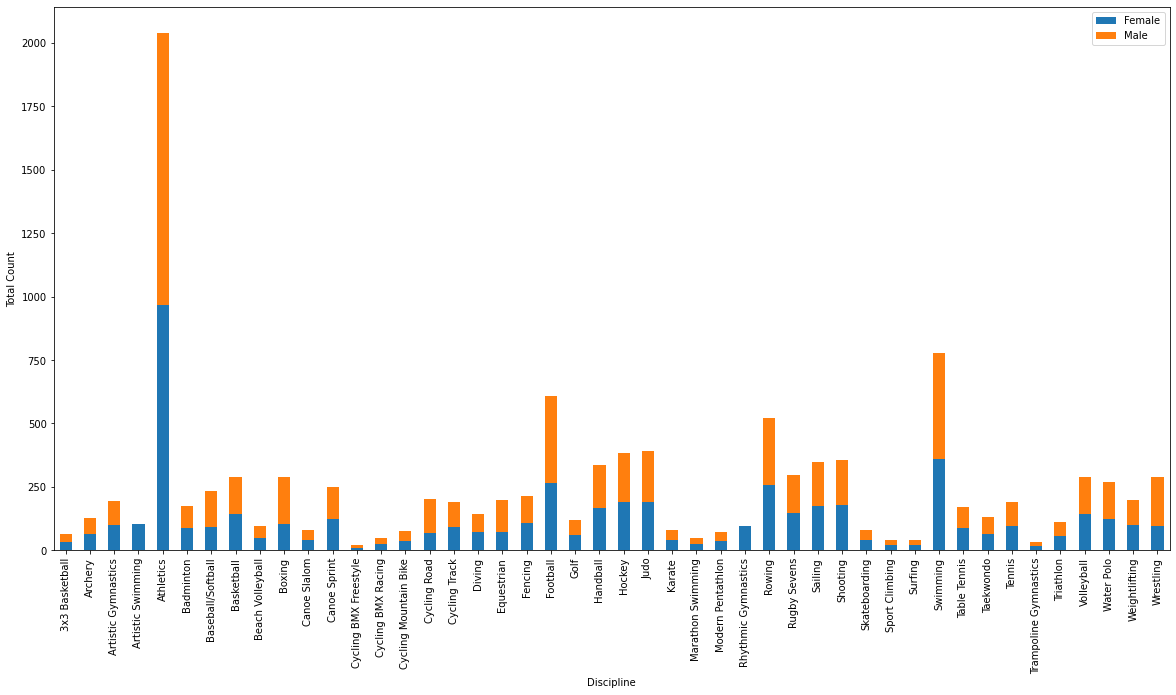

In [37]:
ax = new_df.plot.bar(figsize=(20,10), stacked=True)
ax.set_ylabel('Total Count')

In [43]:
gender_df.drop(['3x3 Basketball'], axis=0)

,Female,Male,Total
Discipline,,,
Archery,64,64,128
Artistic Gymnastics,98,98,196
Artistic Swimming,105,0,105
Athletics,969,1072,2041
Badminton,86,87,173
Baseball/Softball,90,144,234
Basketball,144,144,288
Beach Volleyball,48,48,96
Boxing,102,187,289


In [ ]:
import plotly.express as px

fig = px.bar

In [1]:

df = pd.read_csv('Medals.csv', encoding= 'unicode_escape')
print(df.info())

df.plot.bar()

NameError: name 'pd' is not defined